## EMOTION DETECTION OF TEXT
+ Emotion Detection In Text
+ Text Classifier
 

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np


In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load Dataset
df = pd.read_csv("data/tweet_emotions.csv")

In [5]:
# Preview
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [6]:
# Shape
df.shape

(40000, 3)

In [7]:
# Datatypes
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [8]:
# Check For Missing Values
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [9]:
# Value Counts
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:>

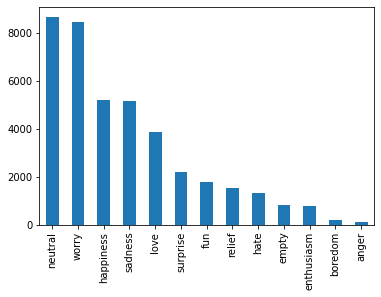

In [10]:
df['sentiment'].value_counts().plot(kind='bar')

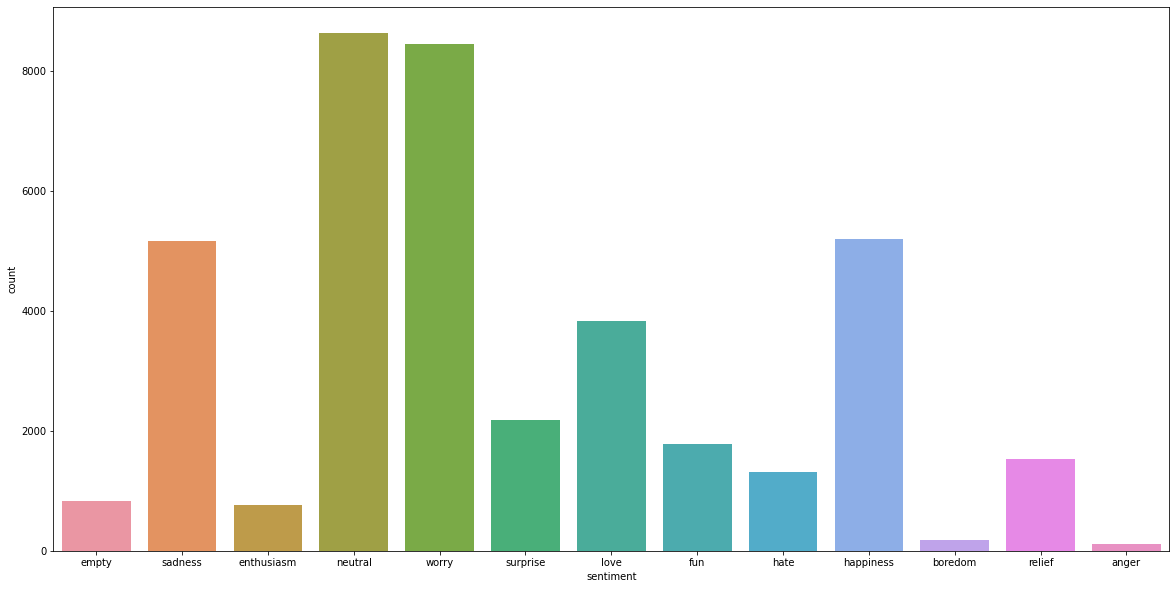

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='sentiment',data=df)
plt.show()

### Exploration
+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction
   - Keywords for each emotion
   - Worldcloud

In [12]:
# Sentiment Analysis
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiments = blob.sentiment.polarity
    if sentiments > 0:
        result = "Positive"
    elif sentiments < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [14]:
# Test Fxn
get_sentiment("i like coding")

'Neutral'

In [15]:
df['Sentiment'] = df['content'].apply(get_sentiment)

In [16]:
df.head()

,tweet_id,sentiment,content,Sentiment
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [17]:
df.groupby(['sentiment','Sentiment']).size()

sentiment   Sentiment
anger       Negative       34
            Neutral        41
            Positive       35
boredom     Negative       80
            Neutral        56
            Positive       43
empty       Negative      168
            Neutral       418
            Positive      241
enthusiasm  Negative      100
            Neutral       254
            Positive      405
fun         Negative      205
            Neutral       474
            Positive     1097
happiness   Negative      345
            Neutral      1224
            Positive     3640
hate        Negative      694
            Neutral       364
            Positive      265
love        Negative      214
            Neutral       684
            Positive     2944
neutral     Negative     1156
            Neutral      4442
            Positive     3040
relief      Negative      207
            Neutral       477
            Positive      842
sadness     Negative     1886
            Neutral      1696
            Positi

<AxesSubplot:xlabel='sentiment,Sentiment'>

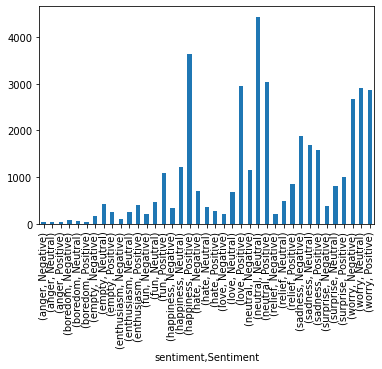

In [18]:
df.groupby(['sentiment','Sentiment']).size().plot(kind='bar')

In [19]:
# Using Seaborn
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7ff46c135040>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

/home/dara/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/dara/.local/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


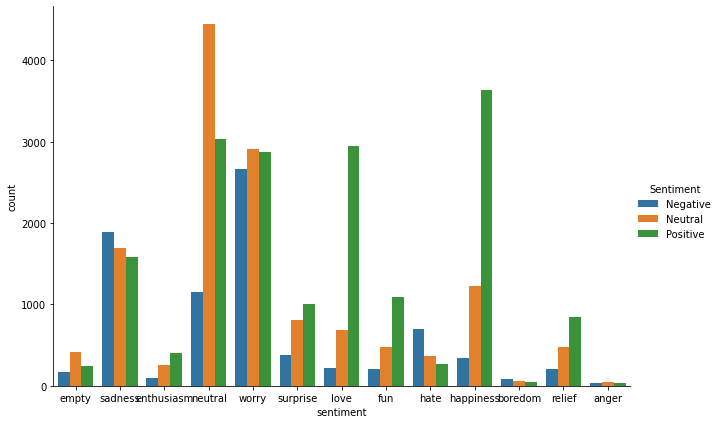

In [20]:
sns.factorplot(x='sentiment',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

/home/dara/.local/lib/python3.8/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


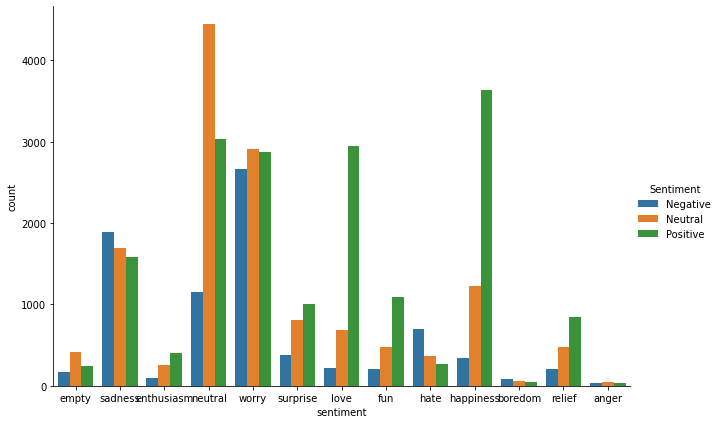

In [21]:
sns.catplot(x='sentiment',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

### Text Cleaning
+ Remove noice
    - stopword
    - special characters
    - puctuations
    - emojis

In [22]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [23]:
# User handles
df['Clean_Text'] = df['content'].apply(nfx.remove_userhandles)

In [24]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [25]:
# Punctuations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [26]:
df[['content','Clean_Text']]

,content,Clean_Text
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SINGLE...


### Keyword Extraction
+ Extract most common words as per class of emotion

In [27]:
#Keyword Extraction
from collections import Counter

In [28]:
def extract_keyword(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [29]:
# List of Emotions
emotion_list = df['sentiment'].unique().tolist()

In [30]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [31]:
fun_list = df[df['sentiment'] == 'fun']['Clean_Text'].tolist()

In [32]:
#Fun Document
fun_docx = ' '.join(fun_list)

In [33]:
fun_docx

'Wondering Im awake 7amwriting new songplotting evil secret plots muahahahaoh damn itnot secret anymore lt3 gonna twitter ) cause amazing lol come canada perform RIP leonardo great mini fiddler crab out memo looks amazing OMG Ur alive LOL 2day gone sooo slow Im going insane Grrr tonight california vintage ahahah BEST dresses want dont ebay ( Umm yeah Thats probably pretty good note self eeeeeewwwwwwww Thats awesome weekend cant Im moving Sat lot fun finished im not color drawing come Lettuce amp spinach best cool weather live floridanot luck growing those know enjoy watching twitter entertaining comic miss BFF rocking Hotel California now songs stay same Whats next Hmmm Careless whisper dissapointment hhaha creeped ice cream social good times lars real girl sad movie playing street fighter IV Seth Raped clear DVR getting rid tomorrw hell yeah missed u nite lol u like opinion wish burning trees trying dresses spent 2 hours playing TF2 think Im better started unny today not taking long d

In [34]:
#Extract Keywords
keyword_fun = extract_keyword(fun_docx)

In [35]:
keyword_fun

{'fun': 128,
 'lol': 123,
 'Im': 119,
 'like': 100,
 'good': 90,
 'day': 84,
 'haha': 83,
 'going': 73,
 'im': 71,
 'u': 71,
 'got': 65,
 'think': 59,
 'amp': 58,
 'night': 58,
 'today': 56,
 'know': 54,
 'it': 53,
 'cant': 51,
 'time': 51,
 'great': 47,
 'tonight': 46,
 'love': 44,
 'want': 43,
 'wait': 43,
 '2': 42,
 'right': 42,
 'tomorrow': 41,
 'new': 40,
 'work': 39,
 'funny': 39,
 'gonna': 38,
 'Ill': 37,
 'LOL': 36,
 'yeah': 35,
 'nice': 35,
 'thats': 34,
 'now': 33,
 'home': 33,
 'look': 33,
 'me': 33,
 'cool': 30,
 'better': 30,
 'week': 30,
 'come': 29,
 'Ive': 29,
 'you': 29,
 'way': 29,
 'sleep': 29,
 'getting': 28,
 'morning': 28}

In [36]:
# Plot
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

In [37]:
surprise_list = df[df['sentiment'] == 'surprise']['Clean_Text'].tolist()
#Document
surprise_docx = ' '.join(surprise_list)
#Extract Keywords 
keyword_surprise = extract_keyword(surprise_docx)

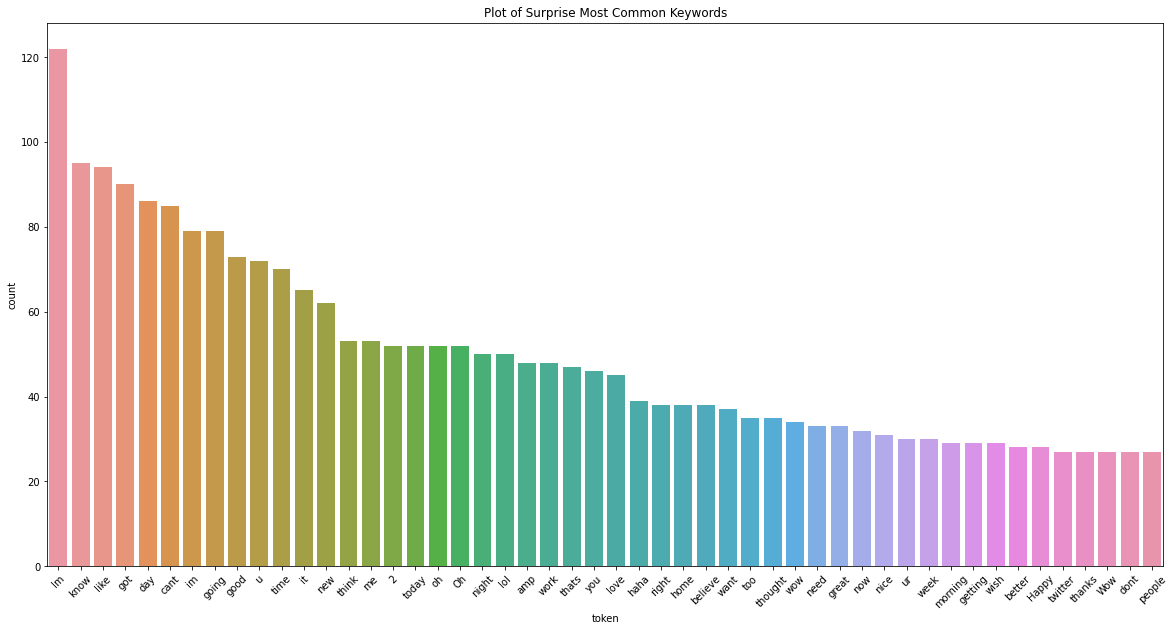

In [38]:
plot_most_common_words(keyword_surprise,"Surprise")

In [39]:
### Word Cloud
from wordcloud import WordCloud

In [40]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

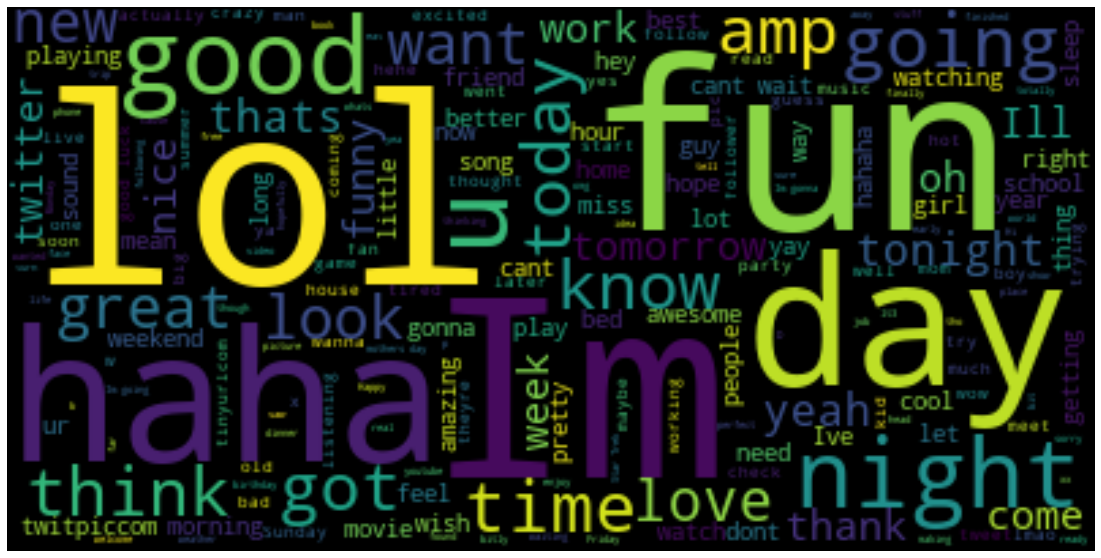

In [41]:
plot_wordcloud(fun_docx)

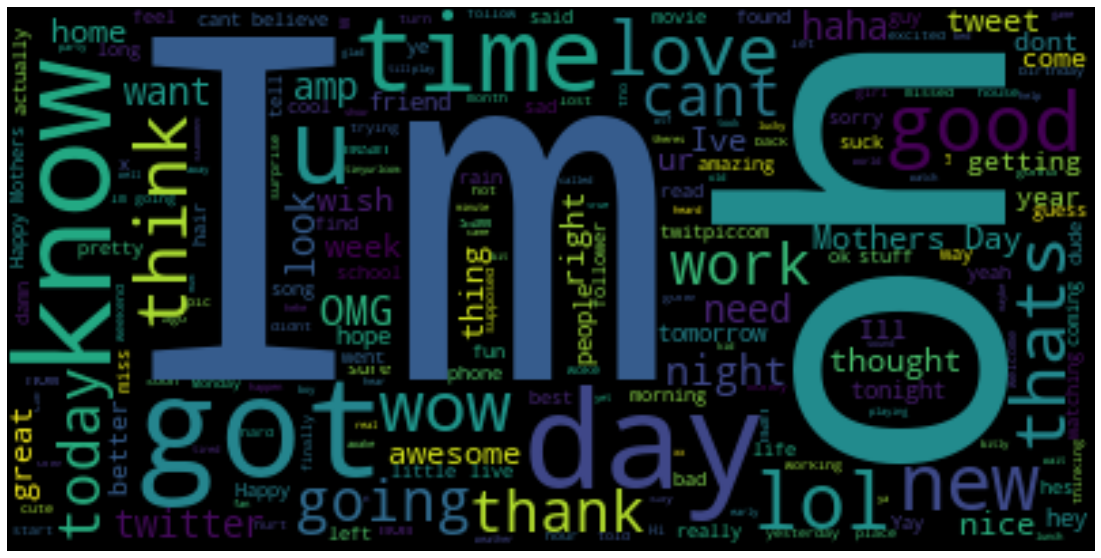

In [42]:
plot_wordcloud(surprise_docx)

### Machine Learing
+ Naive bayes
+ Logistic Regression
+ KNN
+ Decision Tree

Compare with Spark/NLP John Snows Lab

In [44]:
# Load ML Pakages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

ImportError: cannot import name 'TfidVectorizer' from 'sklearn.feature_extraction.text' (/home/dara/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py)

In [45]:
# Split our dataset
from sklearn.model_selection import train_test_split

### Build Features From Our Text

In [72]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

In [73]:
Xfeatures 

0        know listenin bad habit earlier started freaki...
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                  wants hang friends SOON
4                          want trade Houston tickets will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998    WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SINGLE...
39999    bullet train tokyo gf visiting japan thursday ...
Name: Clean_Text, Length: 40000, dtype: object

In [74]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [75]:
# Get features by name
cv.get_feature_names()

/home/dara/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '002',
 '006',
 '00am',
 '00pm',
 '01',
 '010',
 '02',
 '023',
 '024',
 '0255',
 '02mxjj',
 '03',
 '04',
 '04182012154',
 '05',
 '050',
 '050809',
 '053agj',
 '05ixbj',
 '06',
 '0600',
 '06am',
 '07',
 '0783l',
 '079ï',
 '07am',
 '07i',
 '07jzs',
 '07k6e',
 '07k6x',
 '07kbp',
 '07kbq',
 '07kbr',
 '07kjr',
 '07xfs',
 '07xoh',
 '07xoi',
 '07yez',
 '08',
 '080509',
 '080809',
 '08kaifj',
 '09',
 '0930',
 '097dfj',
 '0a7v3j',
 '0ayzyj',
 '0egwanj',
 '0f',
 '0gmunj',
 '0guyoj',
 '0kenjoy',
 '0l2tsj',
 '0ltrdaj',
 '0mqko',
 '0n',
 '0o',
 '0quot',
 '0rpm',
 '0s',
 '0t2b6j',
 '0ut',
 '0wvnpj',
 '0xhu5j',
 '0xoxij',
 '0zr2jqj',
 '0zywwj',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100greatestgames',
 '100msg',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1027',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1034415'

In [77]:
# To Dense Array  (Numpy)
X.toarray()

MemoryError: Unable to allocate 11.1 GiB for an array with shape (40000, 37205) and data type int64

In [78]:
# Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

### Build Our Model

In [79]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [83]:
# Accuracy
# Method1
nv_model.score(X_test,y_test)

0.31566666666666665

In [84]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [85]:
y_pred_for_nv

array(['happiness', 'neutral', 'worry', ..., 'worry', 'neutral',
       'sadness'], dtype='<U10')

### Make a single prediction
+ Vectorized our text
+ Applied our model

In [86]:
sample_text = ["I love coding so much"]

In [88]:
vect = cv.transform(sample_text).toarray()

In [89]:
# Make Prediction
nv_model.predict(vect)

array(['love'], dtype='<U10')

In [90]:
# Check for the Prediction% / Confidence score
nv_model.predict_proba(vect)

array([[8.76387510e-07, 8.08706833e-06, 1.19952398e-04, 1.29182044e-04,
        3.52819900e-03, 8.37822471e-02, 1.05164049e-03, 3.42007934e-01,
        3.10751931e-01, 1.06040171e-03, 5.57514874e-02, 2.81368130e-03,
        1.98994381e-01]])

In [91]:
# Get all class for our model
nv_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [93]:
np.max(nv_model.predict_proba(vect))

0.3420079335719093

In [100]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba))
    print("Prediction: {}, Prediction Score: {}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [101]:
predict_emotion(sample_text,nv_model)

Prediction: love, Prediction Score: 0.3420079335719093


{'anger': array([8.76387510e-07, 8.08706833e-06, 1.19952398e-04, 1.29182044e-04,
        3.52819900e-03, 8.37822471e-02, 1.05164049e-03, 3.42007934e-01,
        3.10751931e-01, 1.06040171e-03, 5.57514874e-02, 2.81368130e-03,
        1.98994381e-01])}

In [103]:
predict_emotion(["He hates Roni"],nv_model)

Prediction: hate, Prediction Score: 0.26909637995356733


{'anger': array([0.00102907, 0.00159448, 0.01261006, 0.0054482 , 0.01780446,
        0.01037322, 0.26909638, 0.02146254, 0.09277907, 0.00838839,
        0.23593286, 0.06133944, 0.26214183])}

### Model Evaluation

In [105]:
# Classification
print(classification_report(y_test,y_pred_for_nv))

NameError: name 'classification_report' is not defined

In [106]:
confusion_matrix(y_test,y_pred_for_nv)

NameError: name 'confusion_matrix' is not defined

In [107]:
# Plot Confusion Matrix
plot_confusion_matrix(nv_model,X_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

### Save Model

In [108]:
import joblib

In [111]:
model_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

### Model Interpration
+ Eli5
+ Lime
+ Shap

In [113]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/home/dara/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
# Accuracy
lr_model.score(X_test,y_test)

0.33408333333333334

In [115]:
# Single Predict
predict_emotion(sample_text,lr_model)

Prediction: love, Prediction Score: 0.41789373896503496


{'anger': array([0.00127638, 0.00836387, 0.01746754, 0.00834891, 0.02357002,
        0.09055996, 0.02000023, 0.41789374, 0.20865675, 0.01590019,
        0.04991008, 0.03558072, 0.10247161])}

In [123]:
# Interpret Model
import eli5

In [124]:
# Show the weights for each class/label
eli5.show_weights(lr_model,top=20)

In [132]:
 class_names = ylabels.unique().tolist()

In [133]:
cv.get_feature_names()

['00',
 '000',
 '002',
 '006',
 '00am',
 '00pm',
 '01',
 '010',
 '02',
 '023',
 '024',
 '0255',
 '02mxjj',
 '03',
 '04',
 '04182012154',
 '05',
 '050',
 '050809',
 '053agj',
 '05ixbj',
 '06',
 '0600',
 '06am',
 '07',
 '0783l',
 '079ï',
 '07am',
 '07i',
 '07jzs',
 '07k6e',
 '07k6x',
 '07kbp',
 '07kbq',
 '07kbr',
 '07kjr',
 '07xfs',
 '07xoh',
 '07xoi',
 '07yez',
 '08',
 '080509',
 '080809',
 '08kaifj',
 '09',
 '0930',
 '097dfj',
 '0a7v3j',
 '0ayzyj',
 '0egwanj',
 '0f',
 '0gmunj',
 '0guyoj',
 '0kenjoy',
 '0l2tsj',
 '0ltrdaj',
 '0mqko',
 '0n',
 '0o',
 '0quot',
 '0rpm',
 '0s',
 '0t2b6j',
 '0ut',
 '0wvnpj',
 '0xhu5j',
 '0xoxij',
 '0zr2jqj',
 '0zywwj',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100greatestgames',
 '100msg',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1027',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1034415'

In [134]:
feature_names = cv.get_feature_names()

In [136]:
eli5.show_weights(lr_model,feature_names = feature_names,target_names = class_names)

### APP

In [139]:
# Core Pkgs
import streamlit as st 
import altair as alt
import plotly.express as px 

# EDA Pkgs
import pandas as pd 
import numpy as np 
from datetime import datetime

# Utils
import joblib 
pipe_lr = joblib.load(open("emotion_classifier_pipe_lr_03_june_2021.pkl","rb"))


# Track Utils
from track_utils import create_page_visited_table,add_page_visited_details,view_all_page_visited_details,add_prediction_details,view_all_prediction_details,create_emotionclf_table

# Fxn
def predict_emotions(docx):
	results = pipe_lr.predict([docx])
	return results[0]

def get_prediction_proba(docx):
	results = pipe_lr.predict_proba([docx])
	return results

emotions_emoji_dict = {"anger":"😠","disgust":"🤮", "fear":"😨😱", "happy":"🤗", "joy":"😂", "neutral":"😐", "sad":"😔", "sadness":"😔", "shame":"😳", "surprise":"😮"}


# Main Application
def main():
	st.title("Emotion Classifier App")
	menu = ["Home","Monitor","About"]
	choice = st.sidebar.selectbox("Menu",menu)
	create_page_visited_table()
	create_emotionclf_table()
	if choice == "Home":
		add_page_visited_details("Home",datetime.now())
		st.subheader("Home-Emotion In Text")

		with st.form(key='emotion_clf_form'):
			raw_text = st.text_area("Type Here")
			submit_text = st.form_submit_button(label='Submit')

		if submit_text:
			col1,col2  = st.beta_columns(2)

			# Apply Fxn Here
			prediction = predict_emotions(raw_text)
			probability = get_prediction_proba(raw_text)
			
			add_prediction_details(raw_text,prediction,np.max(probability),datetime.now())

			with col1:
				st.success("Original Text")
				st.write(raw_text)

				st.success("Prediction")
				emoji_icon = emotions_emoji_dict[prediction]
				st.write("{}:{}".format(prediction,emoji_icon))
				st.write("Confidence:{}".format(np.max(probability)))



			with col2:
				st.success("Prediction Probability")
				# st.write(probability)
				proba_df = pd.DataFrame(probability,columns=pipe_lr.classes_)
				# st.write(proba_df.T)
				proba_df_clean = proba_df.T.reset_index()
				proba_df_clean.columns = ["emotions","probability"]

				fig = alt.Chart(proba_df_clean).mark_bar().encode(x='emotions',y='probability',color='emotions')
				st.altair_chart(fig,use_container_width=True)



	elif choice == "Monitor":
		add_page_visited_details("Monitor",datetime.now())
		st.subheader("Monitor App")

		with st.beta_expander("Page Metrics"):
			page_visited_details = pd.DataFrame(view_all_page_visited_details(),columns=['Pagename','Time_of_Visit'])
			st.dataframe(page_visited_details)	

			pg_count = page_visited_details['Pagename'].value_counts().rename_axis('Pagename').reset_index(name='Counts')
			c = alt.Chart(pg_count).mark_bar().encode(x='Pagename',y='Counts',color='Pagename')
			st.altair_chart(c,use_container_width=True)	

			p = px.pie(pg_count,values='Counts',names='Pagename')
			st.plotly_chart(p,use_container_width=True)

		with st.beta_expander('Emotion Classifier Metrics'):
			df_emotions = pd.DataFrame(view_all_prediction_details(),columns=['Rawtext','Prediction','Probability','Time_of_Visit'])
			st.dataframe(df_emotions)

			prediction_count = df_emotions['Prediction'].value_counts().rename_axis('Prediction').reset_index(name='Counts')
			pc = alt.Chart(prediction_count).mark_bar().encode(x='Prediction',y='Counts',color='Prediction')
			st.altair_chart(pc,use_container_width=True)	



	else:
		st.subheader("About")
		add_page_visited_details("About",datetime.now())





if __name__ == '__main__':
	main()

AttributeError: module 'google.protobuf.descriptor' has no attribute '_internal_create_key'

In [140]:
# Load Database Pkg
import sqlite3
conn = sqlite3.connect('data.db')
c = conn.cursor()


# Fxn
def create_page_visited_table():
	c.execute('CREATE TABLE IF NOT EXISTS pageTrackTable(pagename TEXT,timeOfvisit TIMESTAMP)')

def add_page_visited_details(pagename,timeOfvisit):
	c.execute('INSERT INTO pageTrackTable(pagename,timeOfvisit) VALUES(?,?)',(pagename,timeOfvisit))
	conn.commit()

def view_all_page_visited_details():
	c.execute('SELECT * FROM pageTrackTable')
	data = c.fetchall()
	return data


# Fxn To Track Input & Prediction
def create_emotionclf_table():
	c.execute('CREATE TABLE IF NOT EXISTS emotionclfTable(rawtext TEXT,prediction TEXT,probability NUMBER,timeOfvisit TIMESTAMP)')

def add_prediction_details(rawtext,prediction,probability,timeOfvisit):
	c.execute('INSERT INTO emotionclfTable(rawtext,prediction,probability,timeOfvisit) VALUES(?,?,?,?)',(rawtext,prediction,probability,timeOfvisit))
	conn.commit()

def view_all_prediction_details():
	c.execute('SELECT * FROM emotionclfTable')
	data = c.fetchall()
	return data